# Laboratorio 8
## Procesamiento Digital de Señales
## 2023-2

Santiago Naranjo Sanchez

cc:1017267682

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import Audio
from scipy import signal
from scipy.io.wavfile import read, write
import scipy.io.wavfile as waves
from scipy.signal import resample

#1. Transformada de Fourier de tiempo corto - Espectrogramas

#1.2.1
Cargue, normalice, grafique y escuche la señal compartida (senal1.wav).

In [7]:
file_audio=('audio.wav') # Ruta del archivo con la señal
fs, audio=read(file_audio) # Cargar el archivo
sig=audio/max(abs(audio)) #Audio normalizado
t=np.arange(0,len(sig)/fs,1.0/fs)
plt.figure(figsize=(10,4))
plt.plot(t,sig,color = "#4B0082")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.title("Señal de audio")
plt.grid()
plt.show()
Audio(sig, rate=fs)

ValueError: ignored

¿Qué puede concluir de la gráfica obtenida?

se puede ver que es una señal periodica,dado que se repite aproximadamente cada segundo

#1.3. Extracción de segmentos
También llamado enventanado, es el proceso mediante el cual se segmenta una señal en N ventanas para luego
aplicarle la STFT. Use la función mostrada a continuación y segmente su señal con un tamaño de ventana de 20
ms.

In [ ]:
def extraer_ventanas(signal, size, fs):
  #Comprobando que sea senial mono (1 canal)
  assert(signal.ndim == 1)
  #Tamano de paso
  step=int(0.010*fs)
  n_seg = int((len(signal) - size) / step)
  # extraer segmentos
  windows = [signal[i * step : i * step + size]
        for i in range(n_seg)]
    # stack (cada fila es una ventana)
  return np.vstack(windows)

In [ ]:
windows=extraer_ventanas(sig,int(0.020*fs),fs)
print(windows.shape)#para ver que tamaño tienen al matriz

(646, 320)


In [ ]:
size=int(fs*0.02)
print ('Muestras en los 20 milis :',size)

Muestras en los 20 milis : 320


#1.4 Consulte
Consulte cómo se construye y se aplica una ventana Hamming a una señal. ¿Qué tamaño de ventana debe usar?



La ventana de Hamming se construye expandiendo la longitud de la ventana en una sola muestra, se construye una ventana simétrica y se elimina la última muestra.

La funcion de la ventana es la siguiente:  w(n)=0.54−0.46∗cos(2πn/N) , donde:
* n es la posición del punto en la señal
*  N es el tamaño de la ventana
* cos es la función coseno

Para aplicar la ventana Hamming a una señal: Selecciona la señal que deseas procesar.

Selecciona el tamaño de la ventana Hamming.
El tamaño de la ventana debe ser menor que el tamaño de la señal.

Calcula la función de ventana Hamming para el tamaño de la ventana seleccionado.

Multiplica la señal por la función de ventana Hamming

#1.4.3
Usando un subplot, grafique un segmento antes y después de aplicarle la ventana Hamming. ¿Observa alguna diferencia? Explique.

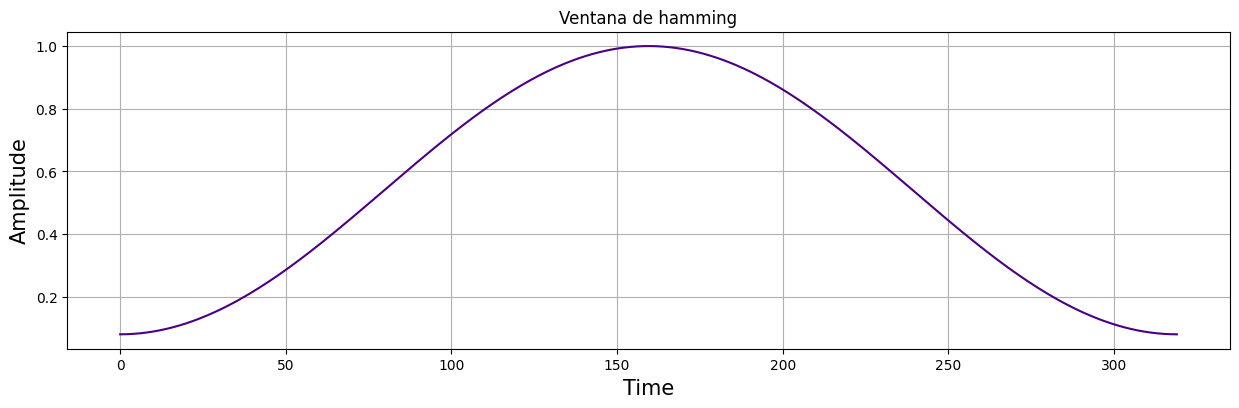

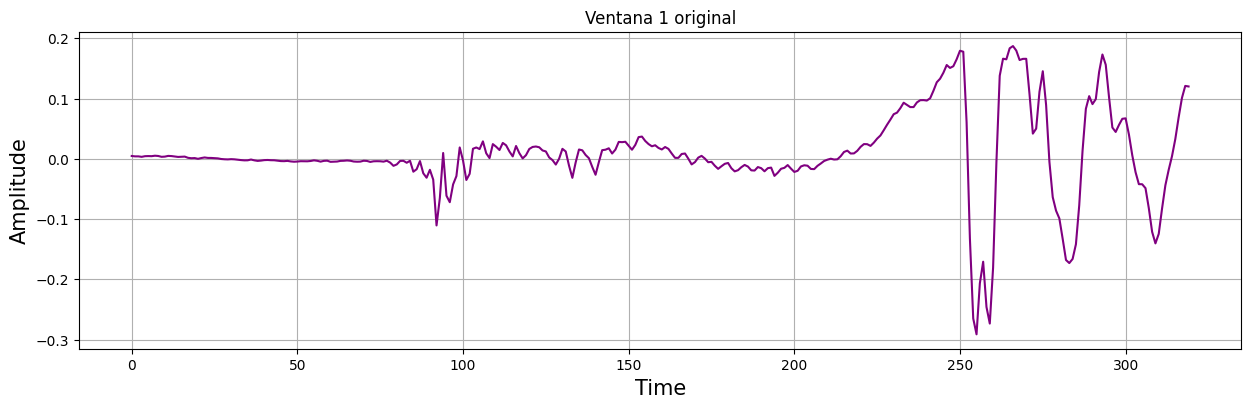

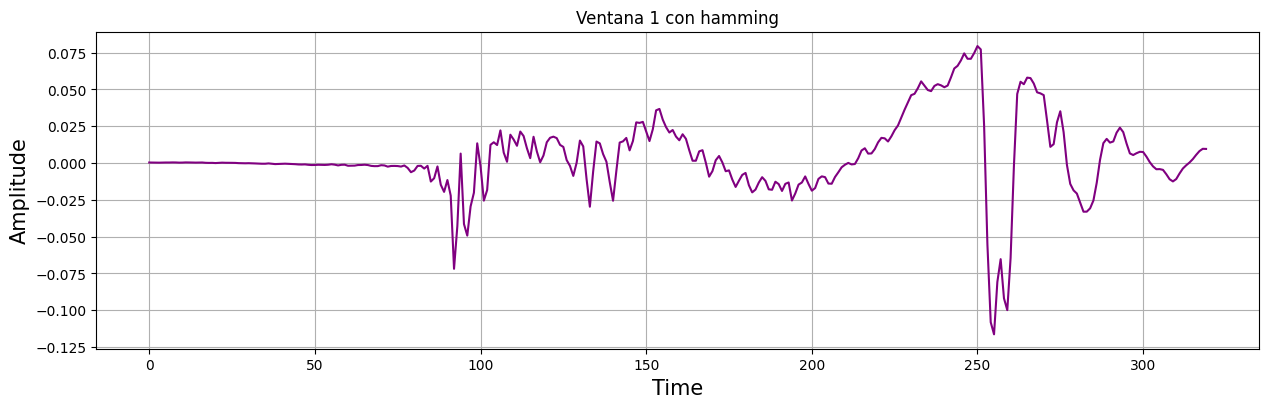

In [ ]:
ventanas=extraer_ventanas(sig,int(0.020*fs),fs)
window=np.hamming(len(ventanas[0]))
v_hamming=window*ventanas
plt.figure(figsize=(15,14))
plt.subplot(3,1,1)
t=np.arange(0,len(window))
plt.plot(t,window,color="#4B0082")
plt.title('Ventana de hamming')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.grid()
plt.show()
k=2
graficas=[ventanas[2], v_hamming[2]]
for i in graficas:
    plt.figure(figsize=(15,14))
    plt.subplot(3,1,k)
    t=np.arange(0,len(i))
    plt.plot(t,i[0:],color='purple')
    if(k==2):
        plt.title('Ventana 1 original')
    else:
        plt.title('Ventana 1 con hamming')
    plt.xlabel('Time',fontsize=15)
    plt.ylabel('Amplitude',fontsize=15)
    plt.grid()
    plt.show()
    k=k+1

se ve una diferencia en la amplitud de las graficas
esto se debe a los coeficientes a la hora de  multiplicar las señal orginal por la ventana

#1.5 Aplicación de la STFT

In [ ]:
def potspec(X, size, n_padded_min=0):
    # Zero padding para la proxima potencia de 2
    if n_padded_min==0:
        n_padded = max(n_padded_min, int(2 ** np.ceil(np.log(size) / np.log(2))))
    else:
        n_padded = n_padded_min
    # Transformada de Fourier
    Y = np.fft.fft(X, n=n_padded)
    Y = np.absolute(Y)
    # non-redundant part
    m = int(n_padded / 2) + 1
    Y = Y[:, :m]
    return np.abs(Y) ** 2, n_padded

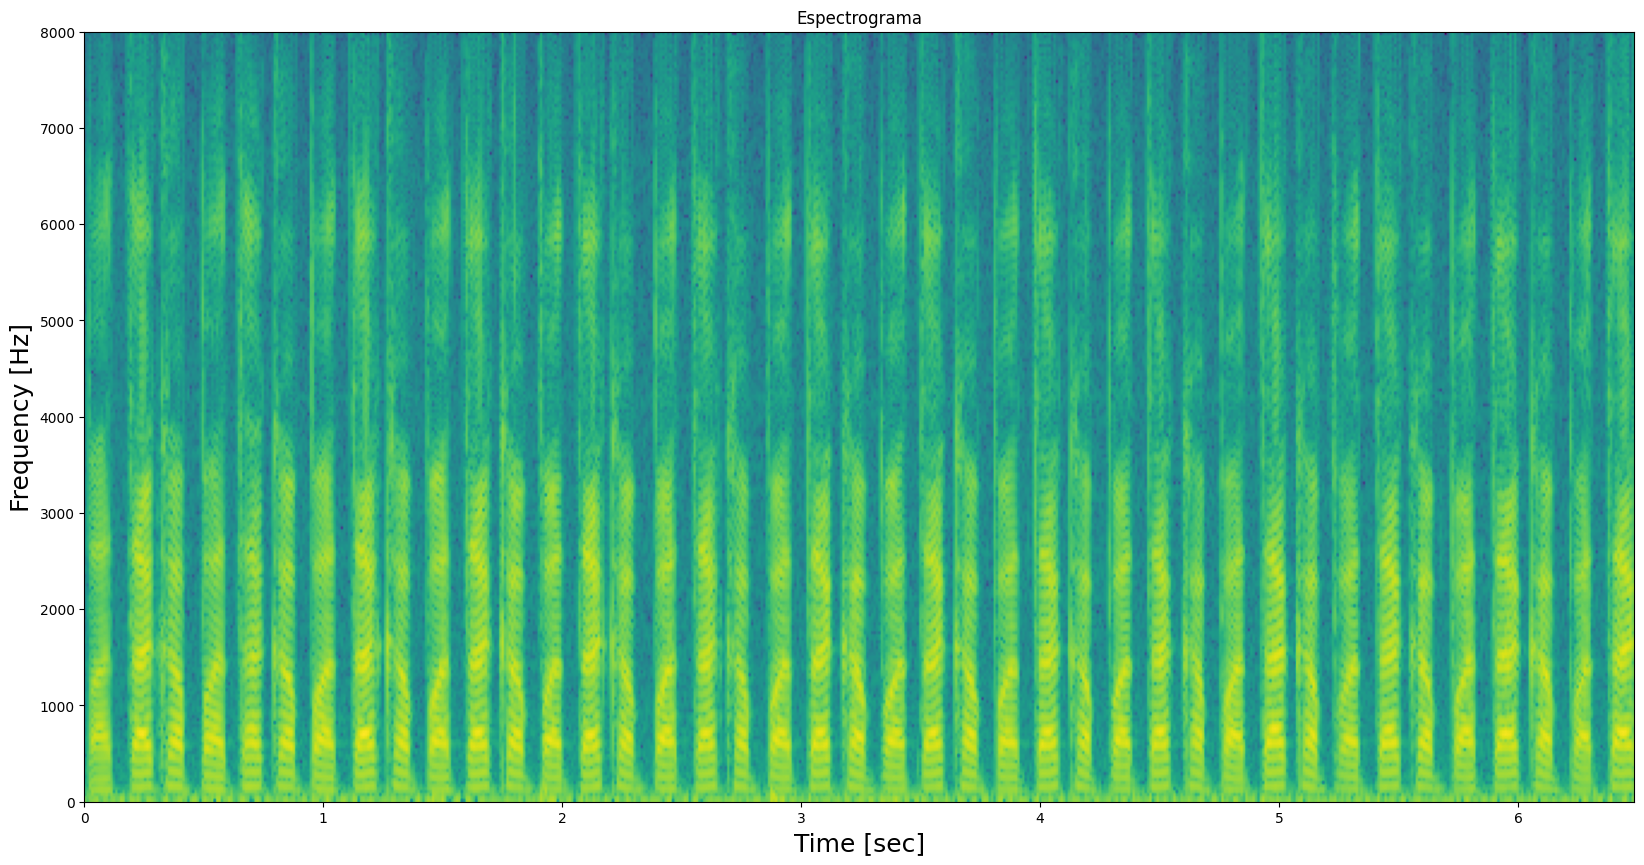

In [ ]:
espectro, nfft= potspec(v_hamming,320,512)
espectro=np.flipud(10*np.log10(espectro).T)
plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.imshow(espectro,aspect='auto', extent=[0, len(audio)/fs, 0, fs//2])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

Como en el audio se repite “pa” “ta” “ca”, en cada entonación se forma un pico de energía. Entre más amarillo más energía hay en la frecuencia, en las partes más oscuras la frecuencia en menor. Las partes azules son los silencios que se presentan en el audio.

Está definida en intervalo de 0 a 8kHz, la señal es mas intensa en frecuencias menores a 4kHz

#4
Calcule y grafique la STFT para valores de NFFT equivalentes a 128, 1024 y 2048. ¿Qué diferencia encuentra

al variar este tamaño? ¿A su criterio cuál es el tamaño de NFFT que tiene una mejor resolución tiempo-
frecuencia? Explique.

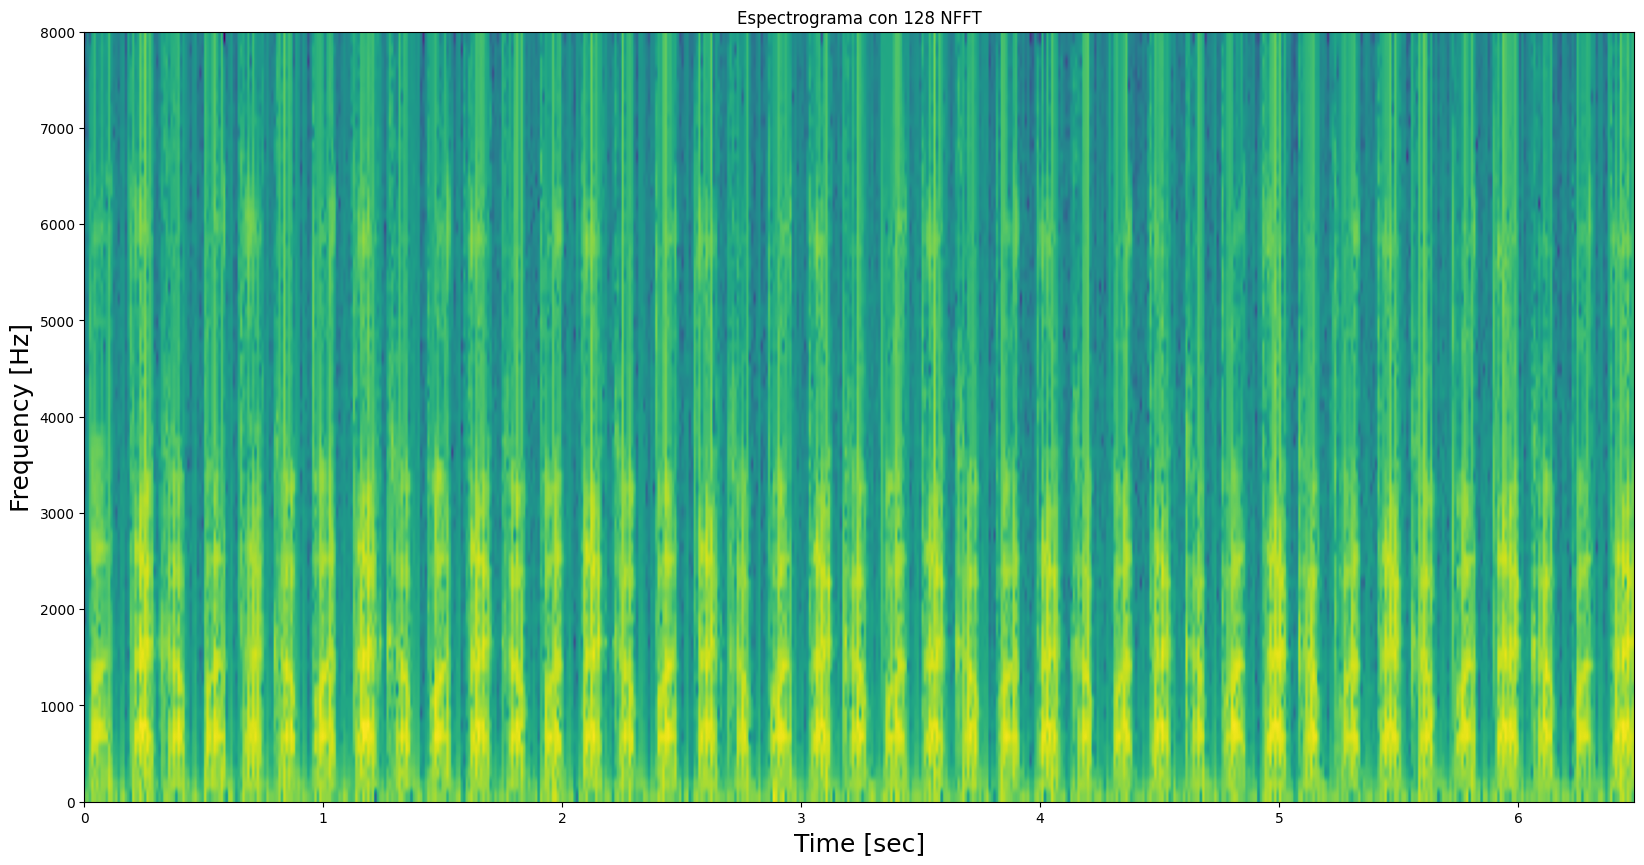

In [ ]:
#NFFT 128
espectro, nfft= potspec(v_hamming,320,128)
espectro=np.flipud(10*np.log10(espectro).T)
plt.figure(figsize=(20,10))
plt.title('Espectrograma con 128 NFFT')
plt.imshow(espectro,aspect='auto', extent=[0, len(audio)/fs, 0, fs//2])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

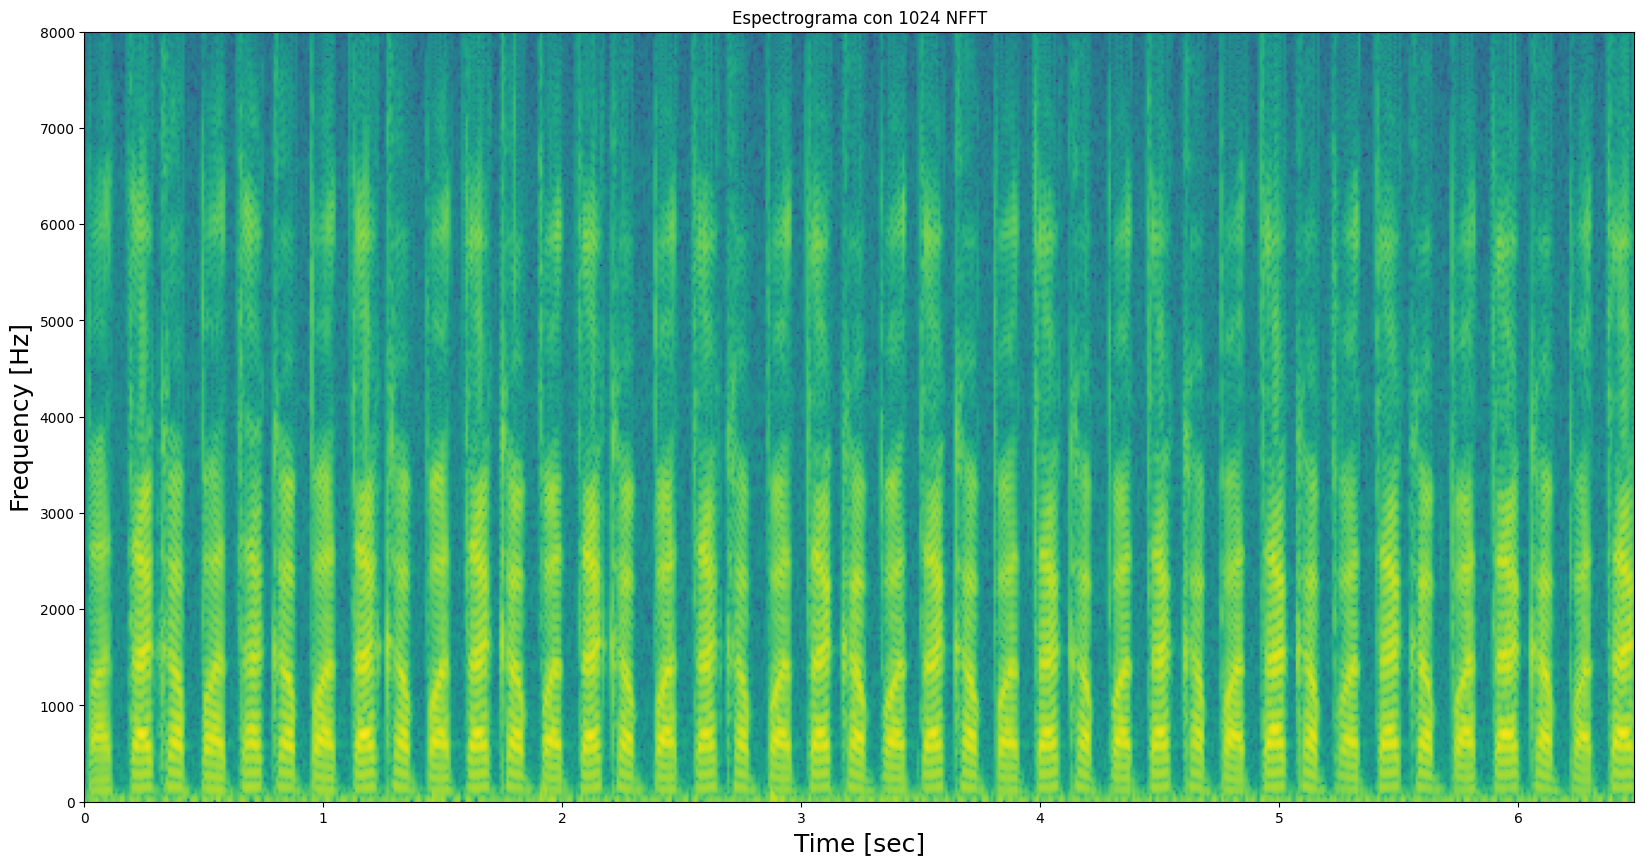

In [ ]:
#NFFT 1024
espectro, nfft= potspec(v_hamming,320,1024)
espectro=np.flipud(10*np.log10(espectro).T)
plt.figure(figsize=(20,10))
plt.title('Espectrograma con 1024 NFFT')
plt.imshow(espectro,aspect='auto', extent=[0, len(audio)/fs, 0, fs//2])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

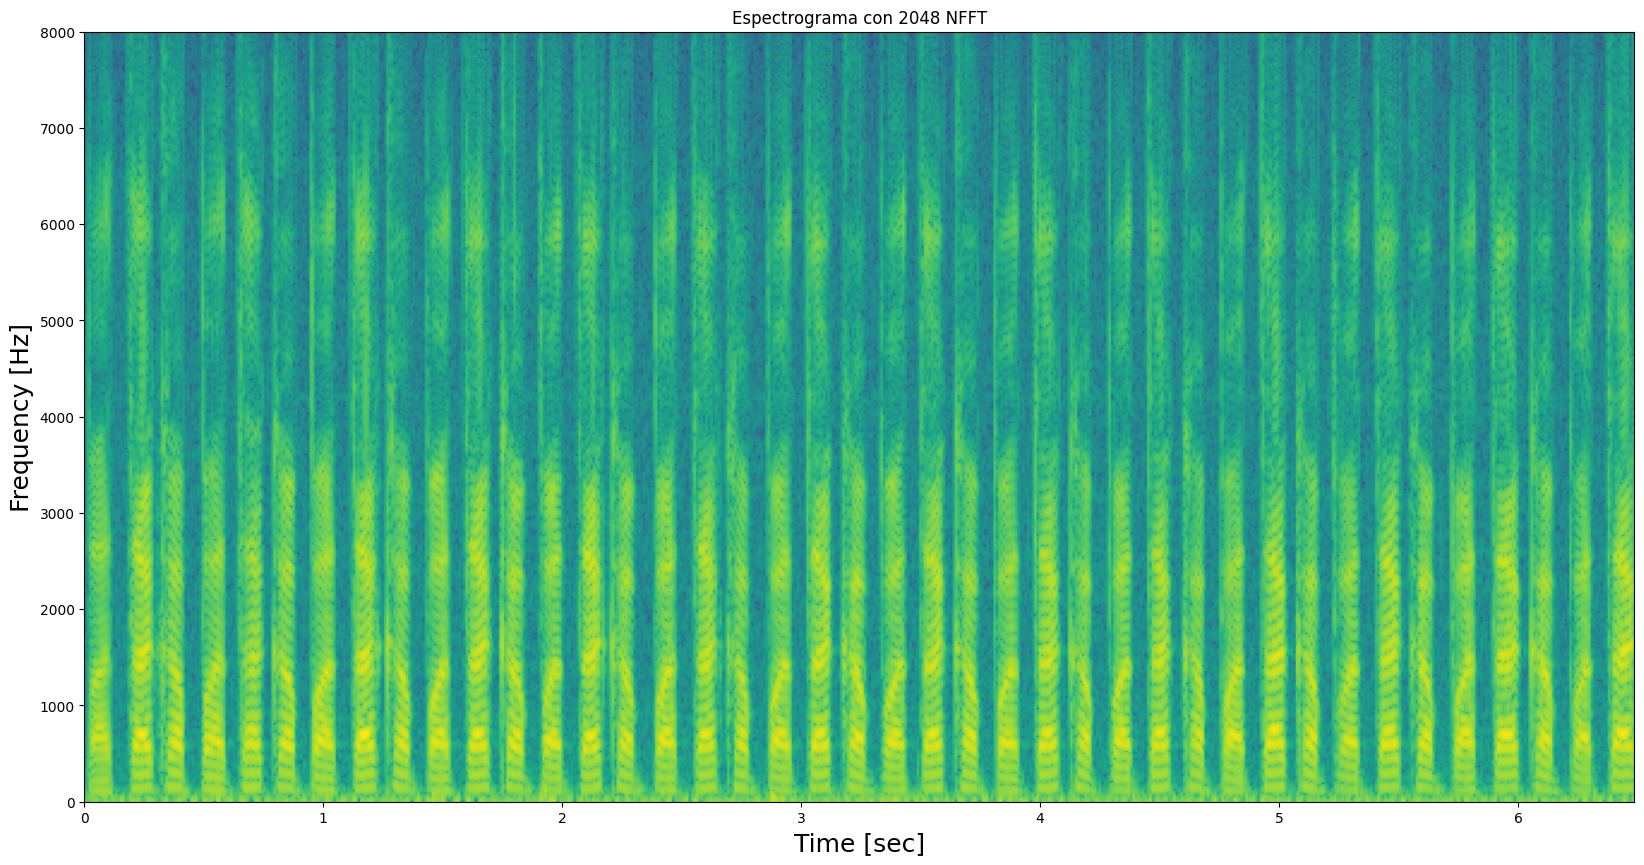

In [ ]:
#NFFT 2048
espectro, nfft= potspec(v_hamming,320,2048)
espectro=np.flipud(10*np.log10(espectro).T)
plt.figure(figsize=(20,10))
plt.title('Espectrograma con 2048 NFFT')
plt.imshow(espectro,aspect='auto', extent=[0, len(audio)/fs, 0, fs//2])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

**¿Que diferencia encuentra al variar el tamaño?¿A su criterio cuál es el tamaño de NFFT que tiene mejor resolucion tiempo-frecuencia?.Explique.**

Al variar el tamaño de NFFT se obseva como los armónicos de la frecuencia se ven más definidos, con poca resolucion las líneas de color amarillo son continuas, con más resolucion las líneas se ven como fragmentadas en la parte de los armónicos

Considero que el mejor tamaño es 1024 ya que no se consumen tantos recursos con esta resolución y permite observar con buena calidad el espectrograma, así mismo permite diferenciar los armónicos y los silencios

## Conclusiones

* El espectrograma permite visualizar como cambia la intensidad de la energia en una señal a partir de las frecuencias que la componen en el tiempo, lo que es muy útil en señales de voz para identificar patrones y caracteristicas en la señal

* Utilizar enventado permite extraer pedazos pequeños de la señal lo que permite que el análisis sea más preciso.

* Utilizar los diferentes tipos de ventanas se puede ver afectada la presicion de la amplitud y la resolucion de la frecuencia, por ejemplo la ventana hamming suaviza o atenua los bordes laterales y mantiene en el centro la información.

* Entre mayor sea la resolucion NFFT más consumo tiene el sistema, por esto es mejor tener una resolucion en la cual se observe bien el espectrograma pero no consuma tanto.

* La informacion la dan la intensidad de los colores en el tiempo